In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [2]:
rng = RandomState(0)

In [90]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape
faces.shape

(400, 4096)

In [ ]:
data_cov = np.matmul(data.T, data)/399

In [6]:
faces = fetch_olivetti_faces()
targets = faces.target
data = faces.images.reshape((len(data.images), -1))

#test_idx = [1,  10, 29, 34, 87,  94, 78, 320]
test_idx = [1, 87, 94, 78]
train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

train_set = data[train_idx ]
y_train = targets[train_idx] 
test_set = data[np.array(test_idx)]
y_test = targets[ np.array(test_idx)]
testImage = test_set[0, :]
print(data.shape, train_set.shape,test_set.shape, testImage.shape)

(400, 4096) (396, 4096) (4, 4096) (4096,)


In [77]:
centered_data = data - np.mean(data, axis=0)
print(centered_data.shape)

(400, 4096)


In [81]:
mean_data = np.mean(data, axis=0)
#centered_data2 = 
data.T.shape

(4096, 400)

In [7]:
data_cov = np.matmul(data.T, data)/399

In [8]:
eigvals, eigvec = np.linalg.eig(data_cov)

In [11]:
eigvec.shape

(4096, 4096)

In [31]:
principal_components_2 = np.matmul(centered_data, eigvec)

In [32]:
principal_components_2.shape

(400, 4096)

In [20]:
centered_cov = np.cov(data, rowvar=False)

In [21]:
centered_cov_2 = np.matmul(centered_data.T, centered_data)/399

In [22]:
print(centered_cov_2.shape, centered_cov.shape)

(4096, 4096) (4096, 4096)


In [23]:
print(np.allclose(centered_cov, centered_cov))

True


In [24]:
pc_eigvals, principal_components = np.linalg.eigh(centered_cov)

In [25]:
print(principal_components.shape)

(4096, 4096)


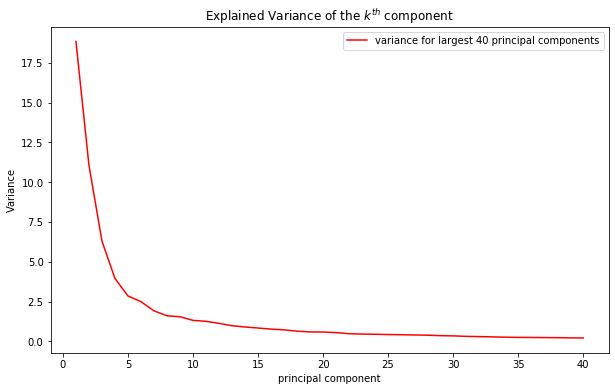

In [226]:
k = 40
idx = np.argsort(pc_eigvals)[::-1][:k]
evecs = principal_components[:,idx]
evals = pc_eigvals[idx]  
fig, ax = plt.subplots(figsize=(10, 6))
k_range = range(1, k+1)
ax.plot(k_range, evals, "-", color="red", label="variance for largest {} principal components".format(k))
ax.set_xlabel("principal component")
ax.set_ylabel("Variance")
ax.set_title(r"Explained Variance of the $k^{th}$ component")
ax.legend()
plt.show();

In [26]:
model = PCA(n_components=data.shape[0])
model.fit_transform(data)
#print(model.explained_variance_)
print(model.components_[0,:])

[-0.00419107 -0.00710951 -0.0093361  ...  0.0001852   0.0033797
  0.0031883 ]


In [30]:
model.components_.shape

(400, 4096)

In [41]:
principal_components_2[399,:]

array([ 8.0635262e-01,  2.5712309e+00,  1.2306758e+00, ...,
        1.7869752e-05, -8.9779496e-07, -5.8952719e-06], dtype=float32)

In [44]:
principal_components[:,4095]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337966,  0.00318826])

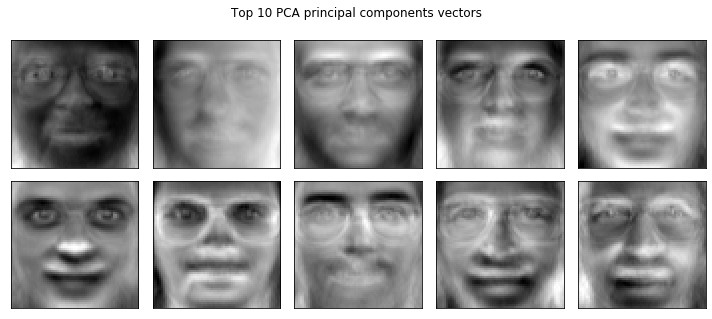

In [228]:
k =10
title = "Top {} PCA principal components vectors".format(k)
plot_tools.plot_image_grid(model.components_[:k,:], title)

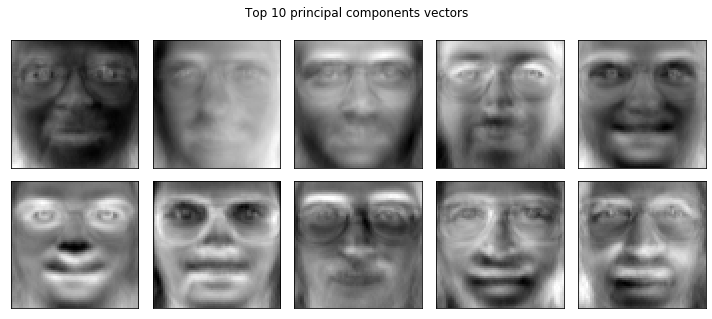

In [229]:
k = 10
idx = np.argsort(pc_eigvals)[::-1][:k]
pc_evecs = principal_components[:, idx].T
title = "Top {} principal components vectors".format(k)
plot_tools.plot_image_grid(pc_evecs, title)

In [230]:
principal_components[:,4095]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337966,  0.00318826])

In [231]:
principal_components[:, ]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.35690806e-03, -2.85913917e-02, -4.19110344e-03],
       [ 1.05458321e-01,  1.46767303e-01, -1.61858411e-03, ...,
        -3.25796997e-04, -3.32883617e-02, -7.10950080e-03],
       [-4.83516464e-01, -3.20189696e-02, -8.19385441e-02, ...,
        -1.97989097e-04, -3.78464972e-02, -9.33609356e-03],
       ...,
       [-2.90173507e-04,  7.12877657e-03,  1.51463119e-03, ...,
        -1.54136527e-02,  2.96278271e-02,  1.85158524e-04],
       [ 1.66065172e-03,  1.49552039e-03, -1.46579176e-02, ...,
        -1.37097845e-02,  2.72129858e-02,  3.37965507e-03],
       [-4.29415118e-03,  7.20154923e-03,  4.51576672e-03, ...,
        -1.18834136e-02,  2.48889921e-02,  3.18825641e-03]])

In [232]:
model.explained_variance_[1]

11.071768

In [233]:
evals

array([18.8401758 , 11.07176208,  6.30461472,  3.95458409,  2.85604263,
        2.49770996,  1.92006327,  1.61115887,  1.54922241,  1.32295079,
        1.2621089 ,  1.13691018,  0.98639767,  0.90758982,  0.84092822,
        0.77355361,  0.72714291,  0.64526596,  0.5964511 ,  0.59100007,
        0.55270137,  0.48628206,  0.46199243,  0.45075356,  0.43213569,
        0.42079375,  0.40652156,  0.39230014,  0.36209505,  0.34905587,
        0.31805606,  0.30396364,  0.28636868,  0.26468354,  0.25347911,
        0.2500455 ,  0.24142672,  0.23627409,  0.22322457,  0.2167887 ])

# Principal direction vectors

In [234]:
cov = np.matmul(data.T, data)/399
pd_eigvals, principal_directions = np.linalg.eigh(cov)

In [235]:
principal_directions[:,4095]

array([-0.01119389, -0.01218334, -0.0133833 , ..., -0.00887096,
       -0.00861543, -0.00853279], dtype=float32)

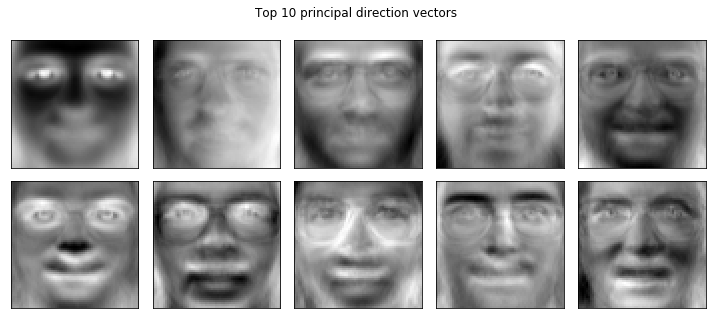

In [236]:
k = 10
idx = np.argsort(pd_eigvals)[::-1][:k]
pd_evecs = principal_directions[:,idx].T
title = "Top {} principal direction vectors".format(k)
plot_tools.plot_image_grid(pd_evecs, title)

# PC Nearest Neighbors

In [237]:
k = 40
idx = np.argsort(pc_eigvals)[::-1][:k]
top_principal_components = principal_components[:, idx].T
top_principal_components.shape

(40, 4096)

In [238]:
projected_train_set = np.matmul(train_set, top_principal_components.T)
projected_test_set = np.matmul(test_set, top_principal_components.T)
print(projected_train_set.shape, projected_test_set.shape)

(392, 40) (8, 40)


In [239]:
def compute_nearest_neighbors(train_matrix, testImage):
    distances = np.sqrt(np.sum((train_matrix - testImage) ** 2, axis=1))
    idx_of_closest_point_in_train_matrix = np.argsort(distances)
    return idx_of_closest_point_in_train_matrix[0]

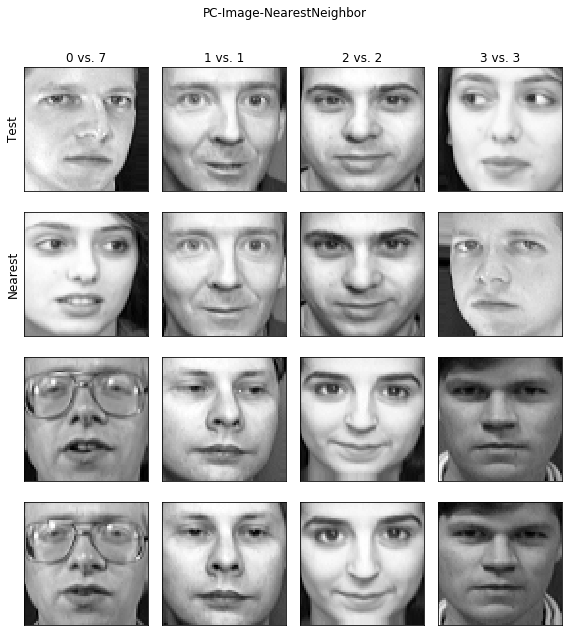

In [241]:
imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test), n_row=4, bycol=True, row_titles=row_titles, col_titles=col_titles)

# KMeans

In [263]:
center = True
n_components = 40
faces = data
if center:
    faces = centered_data
estimator =  KMeans(n_clusters=n_components, random_state=rng)
estimator.fit(faces)
kmeans_components = estimator.cluster_centers_
kmeans_components = components[:n_components]

In [264]:
kmeans_components.shape

(40, 4096)

In [265]:
def plot_gallery(title, images, n_col,n_row, image_shape = (64, 64), cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [268]:
len(kmeans_components)

40

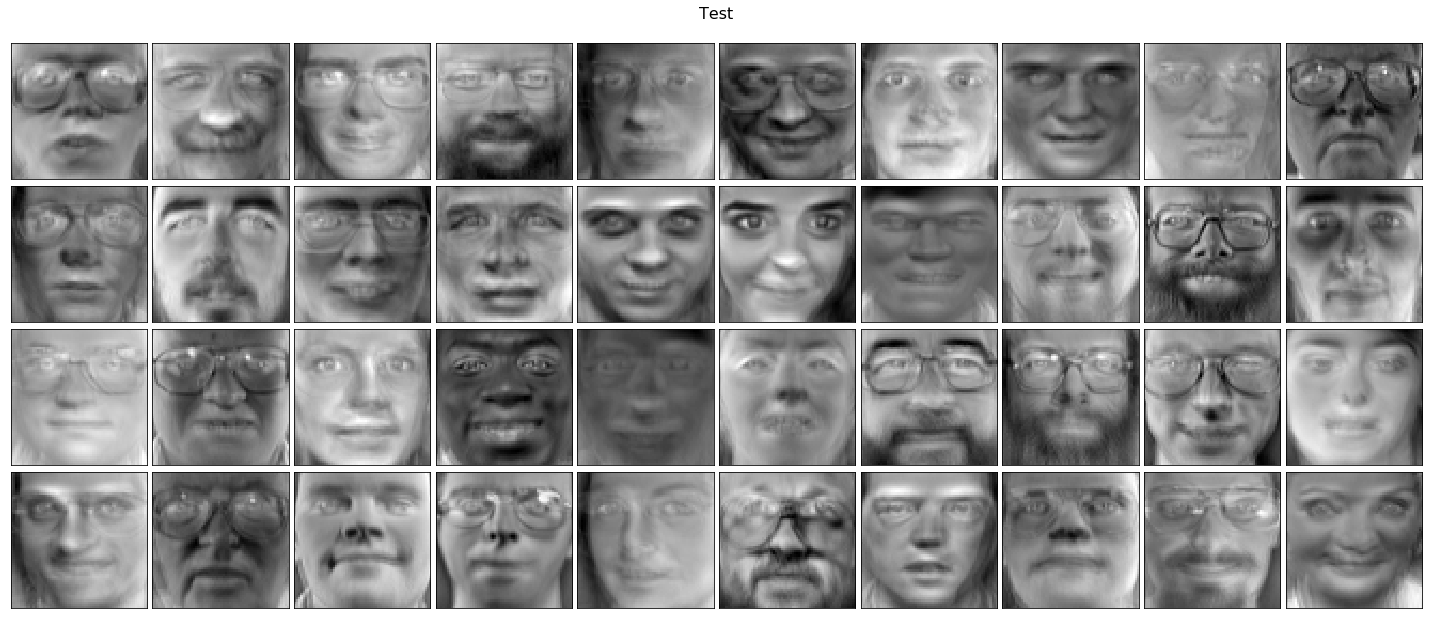

In [267]:
n_row, n_col = 4, 10
plot_gallery('Test', kmeans_components, n_col=n_col, n_row=n_row)

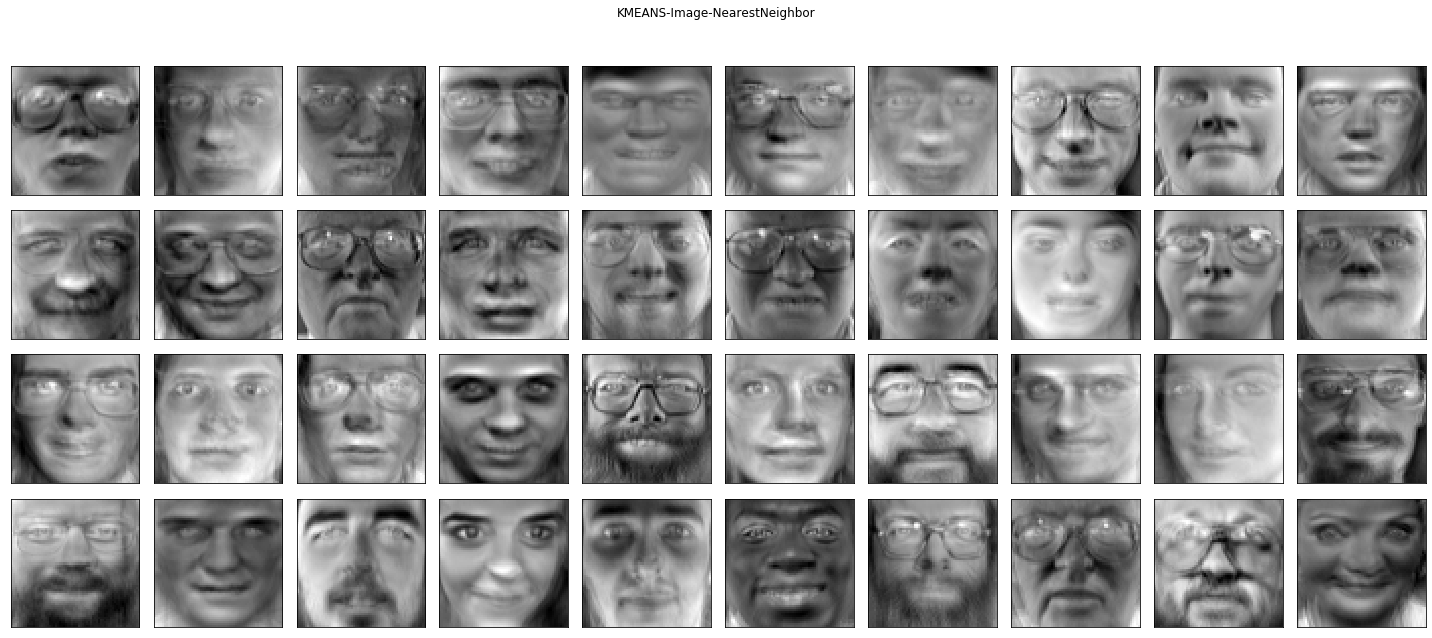

In [269]:
plot_tools.plot_image_grid(kmeans_components, "KMEANS-Image-NearestNeighbor", (64, 64), 10, n_row=4, bycol=True)

# Experimentation

In [272]:
A = np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [274]:
B = A + np.diag([2,2,2])

In [279]:
w_A, v_A = np.linalg.eigh(A)
w_B, v_B = np.linalg.eigh(B)

In [280]:
print("{} \n {} \n {} \n {}".format(w_A, v_A, w_B, v_B))

[1. 1. 1.] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 [3. 3. 3.] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [45]:
A = np.diag([1,2,3])
c_A = A  - np.mean(A, axis=0)
cov_A = np.cov(A, rowvar=False)

In [82]:
A = np.array([[1,2,1], [2,3,2], [4,3,3], [5,5,5]])
A

array([[1, 2, 1],
       [2, 3, 2],
       [4, 3, 3],
       [5, 5, 5]])

In [87]:
A - np.mean(A, axis=0)

array([[-2.  , -1.25, -1.75],
       [-1.  , -0.25, -0.75],
       [ 1.  , -0.25,  0.25],
       [ 2.  ,  1.75,  2.25]])

In [83]:
np.mean(A, axis=1)

array([1.33333333, 2.33333333, 3.33333333, 5.        ])

In [88]:
np.mean(A, axis=0)

array([3.  , 3.25, 2.75])

In [76]:
A - np.mean(A, axis=0)

array([[-1.33333333, -0.66666667, -1.        ],
       [-0.33333333,  0.33333333,  0.        ],
       [ 1.66666667,  0.33333333,  1.        ]])

In [84]:
(A.T - np.mean(A, axis=0)).T

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [71]:
np.array([1,2,1]) - np.array([1.33333333, 1.33333333, 1.33333333])

array([-0.33333333,  0.66666667, -0.33333333])

In [ ]:
w_A, v_A = np.linalg.eigh(cov_A)

In [ ]:
w_A

In [ ]:
v_A

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(3)
pca.fit(A)

In [ ]:
pca.components_

In [ ]:
def pca_code(data):
    #raw_implementation
    var_per=.98
    data= data - np.mean(data, axis=0)
    # data/=np.std(data, axis=0)
    cov_mat=np.cov(data, rowvar=False)
    evals, evecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    variance_retained=np.cumsum(evals)/np.sum(evals)
    print(variance_retained)
    index=np.argmax(variance_retained>=var_per)
    evecs = evecs[:,:index+1]
    reduced_data=np.dot(evecs.T, data.T).T
    print("evals", evals)
    print("_"*30)
    print(evecs.T[1, :])
    print("_"*30)
    clf=PCA(var_per)
    X_train=data
    X_train=clf.fit_transform(X_train)
    print(clf.explained_variance_)
    print("_"*30)
    print(clf.components_)
    print("_"*30)
    print("_"*30)
    print(clf.components_[1,:])
    print("_"*30)

In [ ]:
pca_code(A)